# Modelos estacionarios univariados

### Los datos

En el presente script, continuaremos trabajando con acciones de Tesla por lo que importaremos la serie directamente de Yahoo Finance: https://finance.yahoo.com/quote/TSLA?p=TSLA&.tsrc=fin-srch

In [1]:
#Llamemos al module
import pandas_datareader as pdr

#### Carguemos los datos

In [2]:
import yfinance as yf

# Set the ticker symbol
ticker_symbol = 'TSLA'

# Request the data from Yahoo Finance
df = yf.download(ticker_symbol)

# Print the data info
print(df.info())

[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3540 entries, 2010-06-29 to 2024-07-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3540 non-null   float64
 1   High       3540 non-null   float64
 2   Low        3540 non-null   float64
 3   Close      3540 non-null   float64
 4   Adj Close  3540 non-null   float64
 5   Volume     3540 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 193.6 KB
None


Perfecto hemos recopilado la data de las cotizaciones de las acciones de Tesla desde el año 2017 hasta el presente año y mes, por lo que tenemos un total de 1257 observaciones sin valores perdidos y tres columnas: el valor máximo de cotización en ese día, el valor mínimo de cotización en ese día, su valor a la apertura en la bolsa, su valor al cierre, el volumen de las acciones que se comercializaron en ese día y el valor ajustado al cierre que modifica el precio de cierre de una acción para reflejar el valor de esa acción después de contabilizar cualquier acción corporativa.

Como es habitual procedamos a reemplazar los nombres de las columnas a español:

#### Recodificar el nombre de las columnas a español

In [3]:
df.rename({'Open':'precio_apertura', 'High':'precio_max', 'Low': 'precio_min',
           'Close': 'precio_cierre', 'Adj Close':'precio_ajustado_cierre', 'Volume': 'Volumen'}, axis=1, inplace=True)

In [4]:
df

,precio_apertura,precio_max,precio_min,precio_cierre,precio_ajustado_cierre,Volumen
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-07-17,252.729996,258.470001,246.179993,248.500000,248.500000,115584800
2024-07-18,251.089996,257.140015,247.199997,249.229996,249.229996,110869000
2024-07-19,247.789993,249.440002,236.830002,239.199997,239.199997,87403900


## Modelación de la serie de TESLA

#### Importemos las librerías necesarias

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### 1. Verificar si la serie es estacionaria

Intuitivamente sabemos que la serie no es estacionaria ya que en el script anterior logramos estacionariedad al descomponerla en sus componentes, pero a manera de ejemplo en el presente script usaremos la prueba ADF para asegurarnos.

Recordemos que, usamos la función adfuller de la biblioteca statsmodels y extraemos la estadística ADF y el valor p. Si el estadístico ADF es un número negativo grande y el valor p es menor que 0.05, entonces nuestra serie es estacionaria. De lo contrario, debemos aplicar transformaciones.

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
#utilizamos la variable original para evaluar estacionariedad
result_DF = adfuller(df.precio_cierre[df.index>"2020"])
print('ADF Statistic: %f' % result_DF[0])
print('p-value: %f' % result_DF[1])
print('Critical Values:')
for key, value in result_DF[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.541300
p-value: 0.105746
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


Nuestro estadístico de ADF de -2.30 y nuestro valor p es de 0.17. Aquí, la estadística ADF no es un número negativo grande y el valor "p" es mayor que 0,05. Por lo tanto, nuestra serie de tiempo no es estacionaria, y debemos aplicar transformaciones para hacerla estacionaria.

Para que nuestra serie sea estacionaria, intentaremos estabilizar la tendencia aplicando una diferenciación de primer orden:

$$ d^1_t=Y_{t}-Y_{t-1} $$

PASO 1: sacar la primera diferencia

In [8]:
precio_cierre_diff = df.precio_cierre[df.index>"2020"].diff(1).dropna()

In [9]:
precio_cierre_diff

Date
2020-01-03     0.850000
2020-01-06     0.568666
2020-01-07     1.167999
2020-01-08     1.538668
2020-01-09    -0.720001
                ...    
2024-07-17    -8.059998
2024-07-18     0.729996
2024-07-19   -10.029999
2024-07-22    12.309998
2024-07-23    -4.424988
Name: precio_cierre, Length: 1145, dtype: float64

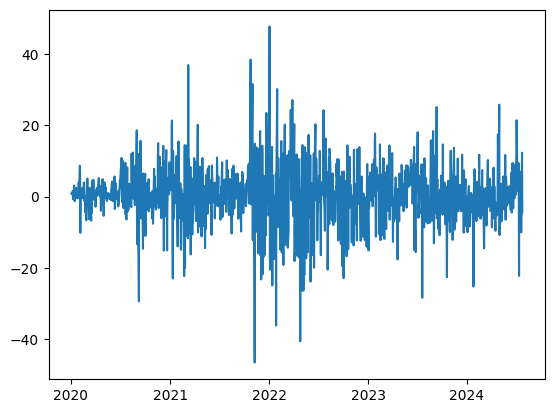

In [10]:
plt.plot(precio_cierre_diff)

Con una transformación aplicada a nuestra serie, podemos probar la estacionariedad nuevamente usando la prueba ADF:

PASO 2: comprobamos estacionariedad

In [11]:
result_DF_diff = adfuller(precio_cierre_diff)
print('ADF Statistic: %f' % result_DF_diff[0])
print('p-value: %f' % result_DF_diff[1])
print('Critical Values:')
for key, value in result_DF_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.973453
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


Esto da una estadística ADF de -8.92 y un valor p de  0. Por lo tanto, con una estadística ADF negativa grande y un valor p mucho menor que 0,05, podemos decir que nuestra serie es estacionaria.

Nuestro siguiente paso es trazar la función de autocorrelación y autocorrelación parcial. La biblioteca statsmodels incluye convenientemente la función plot_acf para nosotros. Simplemente pasamos nuestra serie diferenciada y especificamos el número de retrasos en el parámetro de retrasos.

### 2. Graficar el ACF y el PACF

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams["figure.figsize"] = (8,5)

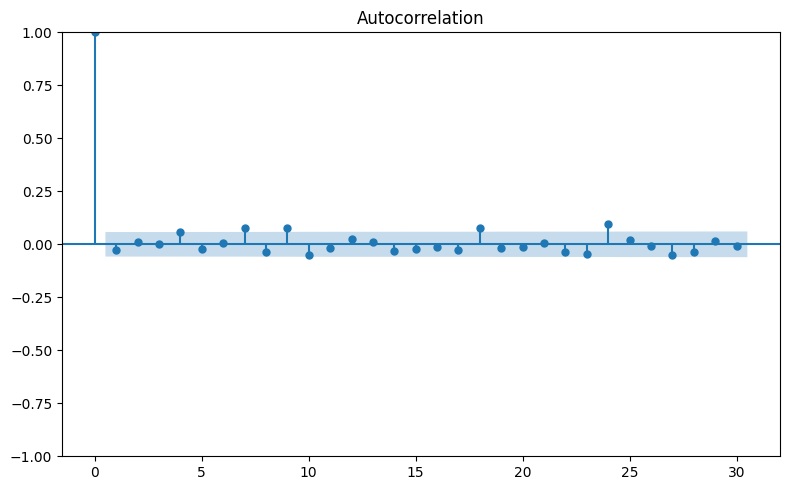

In [13]:
plot_acf(precio_cierre_diff, lags=30);
plt.tight_layout()

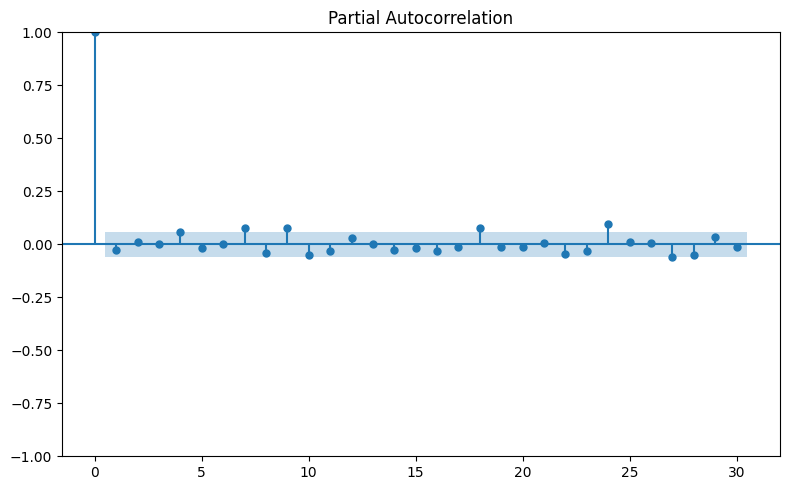

In [14]:
plot_pacf(precio_cierre_diff, lags=30);
plt.tight_layout()

Como podemos observar no existe un comportamiento claro en los gráficos de ACF y PACF, esto en gran medida, se debe a que estamos trabajando con una serie de tiempo diaria que recoge mucho ruido y variabilidad. Recuerden que en la primera tarea de esta semana se pidió trabajar o con una serie semanal o mensual, por lo que en este script ejemplificaremos que sucede con una serie mensual para disminuir las distorsiones excesivas diarias propias de las acciones e incrementar así, su poder predictivo.

#### AR (p)

Para el proceso autoregresivo y conforme a la tabla de la sección teórica, requerimos que el ACF decaiga hacia cero y que haya una posible oscilación, la cual existe por lo cual sabemos que esta serie de tiempo es autoregresiva.

Para su orden, inspeccionamos el PACF, donde los rezagos en 4, 7 son significativos. Luego existe una sección en donde los rezagos 8, 11 y 15 son significativos. Tomemos inicialmente el último rezago significativo del primer grupo AR (4) que es el primer rezago del bloque donde los rezagos a seguir se vuelven no significantes.

#### MA (q)

Para el proceso de medias móviles y conforme a la tabla de la sección teórica, requerimos que el PACF decaiga hacia cero y que haya una posible oscilación. Este componente es menos claro que en el proceso autoregresivo ya que existen varios rezagos que rompen los intervalos de confianza.

Como podemos ver en el ACF, los únicos rezagos significativos son el 4 y el 7. Probaremos inicialmente con MA(4)

### 3. Determinar el modelo

Teniendo en cuenta que partimos de una serie diferenciada, nuestro modelo contará con el componente de integración 1, dado que alcanzó la estacionariedad aplicado las primeras diferencias. Además, en virtud que encontramos autocorrelaciones y aurocorrelaciones parciales significativas, probaremos un modelo ARIMA importando la función arima y especificando loc componentes "p", "q" y "d" que corresponde a la diferenciación.

In [15]:
from statsmodels.tsa.arima.model import ARIMA

Recordemos que AR está en función de (p) y MA en función de (q):

In [16]:
#Definimos el orden de los componentes:
p = 4 #  Un valor de p de 4 significa que se utilizarán los últimos 4 valores de la serie temporal para predecir el siguiente valor.
d = 1 # Un valor de d de 1 indica que se realizará una diferenciación de primer orden para hacer que la serie temporal sea estacionaria.
q = 4 #Un valor de q de 4 significa que se utilizarán los últimos 4 errores de predicción para predecir el siguiente valor.

In [17]:
modelo1 = ARIMA(df.precio_cierre[df.index>"2020"], order=(p, d, q))
resultado1 = modelo1.fit()
print(resultado1.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:          precio_cierre   No. Observations:                 1146
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -4045.710
Date:                Tue, 23 Jul 2024   AIC                           8109.420
Time:                        19:43:54   BIC                           8154.809
Sample:                             0   HQIC                          8126.557
                               - 1146                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0557      0.197     -0.283      0.777      -0.442       0.331
ar.L2          1.0450      0.168      6.223      0.000       0.716       1.374
ar.L3          0.2941      0.134      2.201      0.0

Como podemos observar, recibimos un mensaje en el que la optimización falla, y producto de ello, todos los coeficientes son no-significativos o la mayorìa de ellos.

He aquí donde tenemos que intentar varias combinaciones. Mi primera sugerencia sería eliminar el proceso de medias móviles ya que es aquel que es menos significativo y ver que nos devuelve el modelo:

In [18]:
#Definimos el orden de los componentes:
p = 0 #eliminamos el proceso AR
d = 1
q = 0 # eliminando el proceso MA

In [19]:
modelo1 = ARIMA(df.precio_cierre[df.index>"2020"], order=(p, d, q))
resultado1 = modelo1.fit()
print(resultado1.summary())

                               SARIMAX Results                                
Dep. Variable:          precio_cierre   No. Observations:                 1146
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4054.156
Date:                Tue, 23 Jul 2024   AIC                           8110.312
Time:                        19:43:54   BIC                           8115.356
Sample:                             0   HQIC                          8112.217
                               - 1146                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        69.6609      1.717     40.568      0.000      66.295      73.026
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):               679.02
Prob(Q):                              0.41   Pr

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


#### verificando a priori nuestro guess con: Autoarima!!!

In [20]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 MB/s eta 0:00:00


In [21]:
from pmdarima.arima import auto_arima

# Create an auto ARIMA model
model = auto_arima(df.precio_cierre[df.index>"2020"], seasonal=False, suppress_warnings=True, error_action="ignore")

# Print the model summary
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1146
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4054.156
Date:                Tue, 23 Jul 2024   AIC                           8110.312
Time:                        19:44:28   BIC                           8115.356
Sample:                             0   HQIC                          8112.217
                               - 1146                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        69.6609      1.717     40.568      0.000      66.295      73.026
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):               679.02
Prob(Q):                              0.41   Pr

Muchísimo mejor.

El resumen del modelo proporciona varias medidas estadísticas para evaluar el rendimiento de nuestro modelo, por ejemplo: los parámetros de los coeficientes son altamente significativos ya que todos tienen un valor p inferior a 0,05. por lo que, nos quedaremos con este modelo, y pronosticaremos los valores con esta definición matemática.

### 4. Predicciones modelo AR

In [22]:
from statsmodels.graphics.tsaplots import plot_predict

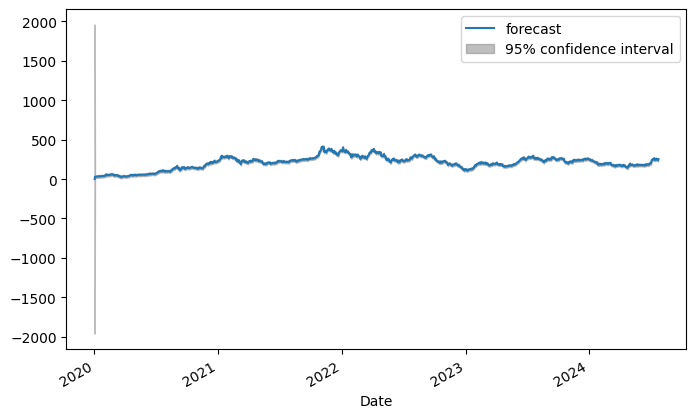

In [23]:
plot_predict(resultado1, dynamic=False)
plt.show()

## Generar las predicciones en datos que el modelo nunca ha visto separando la base de datos en 70% y 30%

In [24]:
train_data=df.precio_cierre[0:int(len(df.precio_cierre)*0.7)]
test_data=df.precio_cierre[int(len(df.precio_cierre)*0.7):]

### For loop para generar cada predicción

In [25]:
historico = train_data.tolist()
predicciones = []
n = len(test_data)
for time_point in range(n):
    model = ARIMA(historico, order=(p,d,q))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predicciones.append(yhat)
    true_test_value = test_data[time_point]
    historico.append(true_test_value)

### Gráfico comparativo de las predicciones punto a punto

In [26]:
p

0

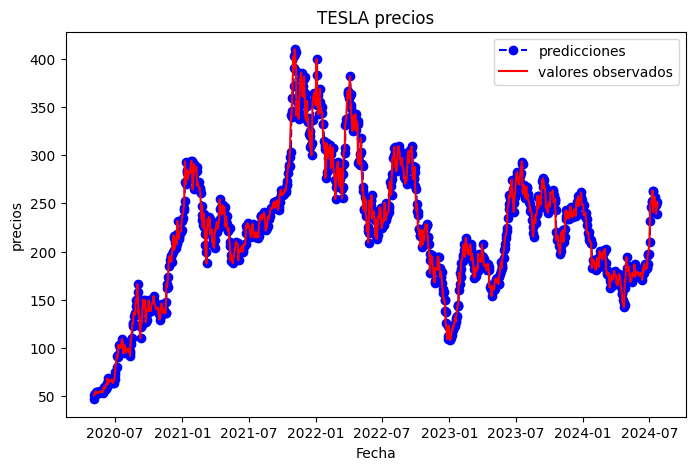

In [27]:
rango = df.precio_cierre[int(len(df.precio_cierre)*0.7):].index
plt.plot(rango, predicciones, color='blue', marker='o', linestyle='dashed', label='predicciones')
plt.plot(rango, test_data, color='red', label='valores observados')
plt.title('TESLA precios')
plt.xlabel('Fecha')
plt.ylabel('precios')

plt.legend()
plt.show()

El modelo sòlo diferenciado, parece predecir decentemente a una frecuencia diaria, ya que los valores reales se encuentran fluctuando alrededor de los valores pronosticados.

Para ajustar más las predicciones podríamos aplicar un modelo SARIMAX, lastimosamente el modelo se escapa a la cobertura de este curso, pero pueden investigarlo online y aplicarlo a nuestra serie.

Grafiquemos los residuos para asegurarnos de que no haya patrones, intentando identificar la media y la varianza constantes:

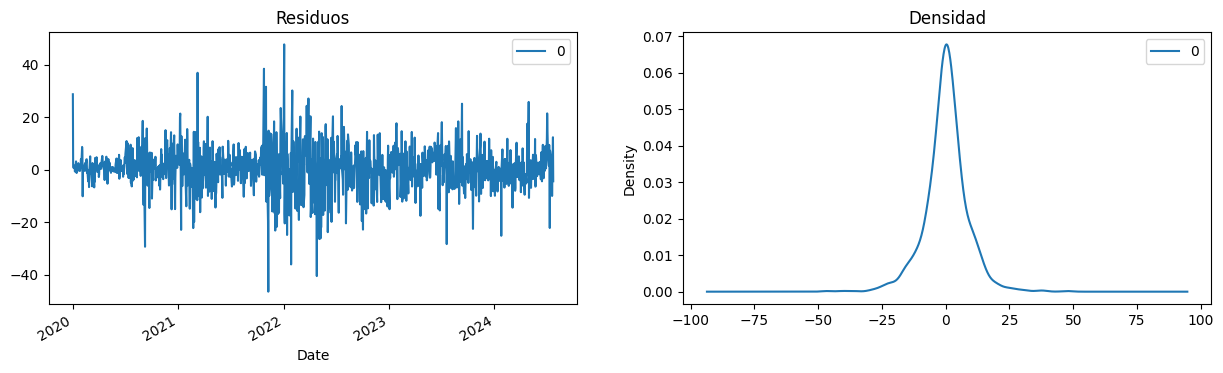

In [28]:
residuos = pd.DataFrame(resultado1.resid)
fig, ax = plt.subplots(1,2, figsize=(15,4))
residuos.plot(title = "Residuos", ax = ax[0])
residuos.plot(kind = 'kde', title = 'Densidad', ax = ax[1])
plt.show()

En el ejemplo anterior, hemos trazado los errores residuales y los gráficos de densidad. Podemos observar que los errores residuales parecen oscilar al alrededor de cero aunque no exctamente y una varianza uniforme en los años posteriores.